## Preamble

In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

In [6]:
$ProcessorCount

2

In [7]:
Unprotect[$ProcessorCount]; $ProcessorCount = 4
SetSystemOptions["ParallelOptions" -> "MathLinkTimeout" -> 100.];

4

{KernelObject[1, local], KernelObject[2, local], KernelObject[3, local], 
 
>   KernelObject[4, local]}
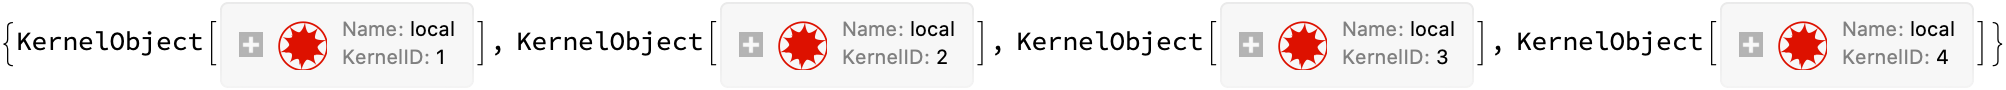

In [10]:
LaunchKernels[4]

{KernelObject[1, local], KernelObject[2, local], KernelObject[3, local], 
 
>   KernelObject[4, local]}
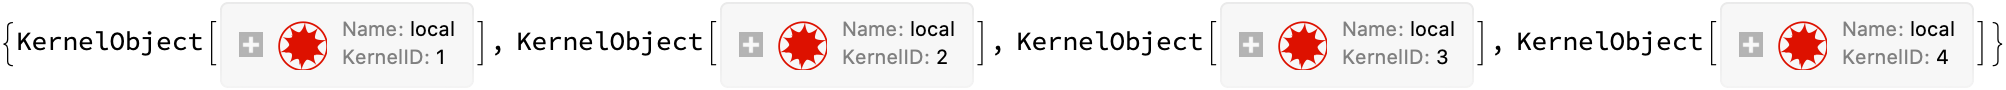

In [11]:
Kernels[]

{Null, Null, Null, Null}
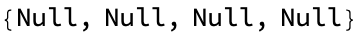

In [14]:
ParallelEvaluate[SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];]

## Background

In [6]:
ai = {1,1.11724,3.12672 10^(-1),-4.68049 10^(-2),-2.65004 10^(-2),-1.19760 10^(-3),1.82812 10^(-4),1.36436 10^(−4),8.55051 10^(−5),1.22840 10^(−5),3.82259 10^(-7),−6.87035 10^(−9)};
bi = {1.43382 10^(−2),1.37559 10^(−2),2.92108 10^(−3),−5.38533 10^(−4),−1.62496 10^(−4),−2.87906 10^(−5),−3.84278 10^(−6),2.78776 10^(−6),7.40342 10^(−7),1.17210 10^(−7),3.72499 10^(−9),−6.74107 10^(−11)};
ci = {1,6.07869 10^(−1),−1.54485 10^(−1),−2.24034 10^(−1),−2.82147 10^(−2),2.90620 10^(−2),6.86778 10^(−3),−1.00005 10^(−3),−1.69104 10^(−4),1.06301 10^(−5),1.69528 10^(−6),−9.33311 10^(−8)};
di = {7.07388 10,9.18011 10,3.31892 10,−1.39779,−1.52558,−1.97857 10^(−2),−1.60146 10^(−1),8.22615 10^(−5),2.02651 10^(−2),−1.82134 10^(−5),7.83943 10^(−5),7.13518 10^(−5)};

In [10]:
grhohigh[T_] = Sum[ai[[i]]Log[T]^(i-1),{i,12}] / Sum[bi[[i]]Log[T]^(i-1),{i,12}];
gshigh[T_] = grhohigh[T] / (1 + Sum[ci[[i]]Log[T]^(i-1),{i,12}]/Sum[di[[i]]Log[T]^(i-1),{i,12}]);

In [12]:
rhohigh[T_] = \[Pi]^2/30 grhohigh[T] T^4;
shigh[T_] = 2\[Pi]^2/45 gshigh[T] T^3;
phigh[T_] = Simplify[T shigh[T] - rhohigh[T]];

In [15]:
Sfit[x_] = 1 + 7/4 Exp[−1.0419x](1 + 1.034x + 0.456426x^2 + 0.0595249x^3);
frho[x_] = Exp[−1.04855x](1 + 1.03757x + 0.508630x^2 + 0.0893988x^3);
brho[x_] = Exp[−1.03149x](1 + 1.03317x + 0.398264x^2 + 0.0648056x^3);
fs[x_] = Exp[−1.04190x](1 + 1.03400x + 0.456426x^2 + 0.0595248x^3);
bs[x_] = Exp[−1.03365x](1 + 1.03397x + 0.342548x^2 + 0.0506182x^3);

In [20]:
me = 511 10^(-6);
mmu = 0.1056;
mpi0 = 0.13;
mpipm = 0.140;
m1 = 0.5;
m2 = 0.77;
m3 = 1.2;
m4 = 2;

In [28]:
Tnu[T_] = (4/11)^(1/3) Sfit[me/T]^(1/3) T;

In [29]:
grhogammalow[T_] = 2.030 + 3.495frho[me/T] + 3.446frho[mmu/T] + 1.05brho[mpi0/T] + 2.08brho[mpipm/T] + 4.165brho[m1/T] + 30.55brho[m2/T] + 89.4brho[m3/T] + 8209brho[m4/T];
gsgammalow[T_] = 2.008 + 3.442fs[me/T] + 3.468fs[mmu/T] + 1.034bs[mpi0/T] + 2.068bs[mpipm/T] + 4.16bs[m1/T] + 30.55bs[m2/T] + 90bs[m3/T] + 6209bs[m4/T];
grhonulow[T_] = 1.353Sfit[me/T]^(4/3);
gsnulow[T_] = 1.923Sfit[me/T];

In [33]:
rhogammalow[T_] = \[Pi]^2/30 grhogammalow[T] T^4;
sgammalow[T_] = 2\[Pi]^2/45 gsgammalow[T] T^3;
rhonulow[T_] = \[Pi]^2/30 grhonulow[T] T^4;
snulow[T_] = 2\[Pi]^2/45 gsnulow[T] T^3;
pgammalow[T_] = Simplify[T sgammalow[T] - rhogammalow[T]];
pnulow[T_] = Simplify[Tnu[T] snulow[T] - rhonulow[T]];
rholow[T_] = Simplify[rhogammalow[T] + rhonulow[T]];
plow[T_] = Simplify[pgammalow[T] + pnulow[T]];

In [41]:
Tth = 0.12;

In [42]:
grho[T_] := grhohigh[T] /; T>=Tth
grho[T_] := grhogammalow[T] + grhonulow[T] /; T<Tth
grhop[T_] := grhohigh'[T] /; T>=Tth
grhop[T_] := grhogammalow'[T] + grhonulow'[T] /; T<Tth
gs[T_] := gshigh[T] /; T>=Tth
gs[T_] := gsgammalow[T] + gsnulow[T] /; T<Tth

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       Dashing[{Small, Small}], AbsoluteThickness[2]]}, {g   , g   }, 
                                                           * ρ   * s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.8}, Identity]]
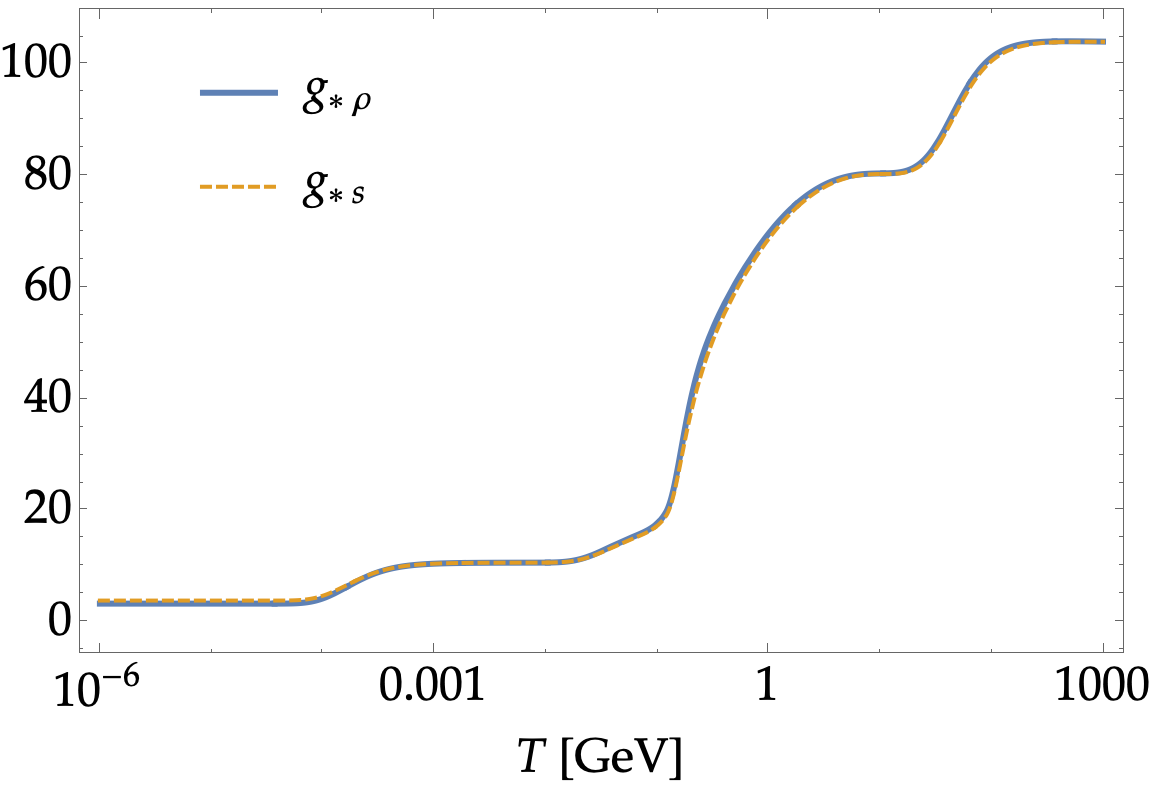

In [48]:
LogLinearPlot[{grho[T],gs[T]},{T,10^(-6),10^3}, FrameLabel->{Row[{T, " [GeV]"}],None}, PlotStyle->{AbsoluteThickness[3],{Dashed,AbsoluteThickness[2]}}, 
              PlotLegends->Placed[{Subscript[g,"*"\[Rho]],Subscript[g,"*"s]}, {0.2,0.8}]] // Quiet

In [49]:
rho[T_] := rhohigh[T] /; T>=Tth
rho[T_] := rholow[T] /; T<Tth
press[T_] := phigh[T] /; T>=Tth
press[T_] := plow[T] /; T<Tth

In [53]:
EoSw[T_] = press[T] / rho[T];
cs2[T_] := phigh'[T] / rhohigh'[T] /; T>=Tth (*4(4gshigh[T]+T gshigh'[T])/3/(4grhohigh[T]+T grhohigh'[T]) - 1 /; T>=Tth;*)
cs2[T_] := plow'[T] / rholow'[T] /; T<Tth

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                               2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {w, c  }, 
                                                              s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
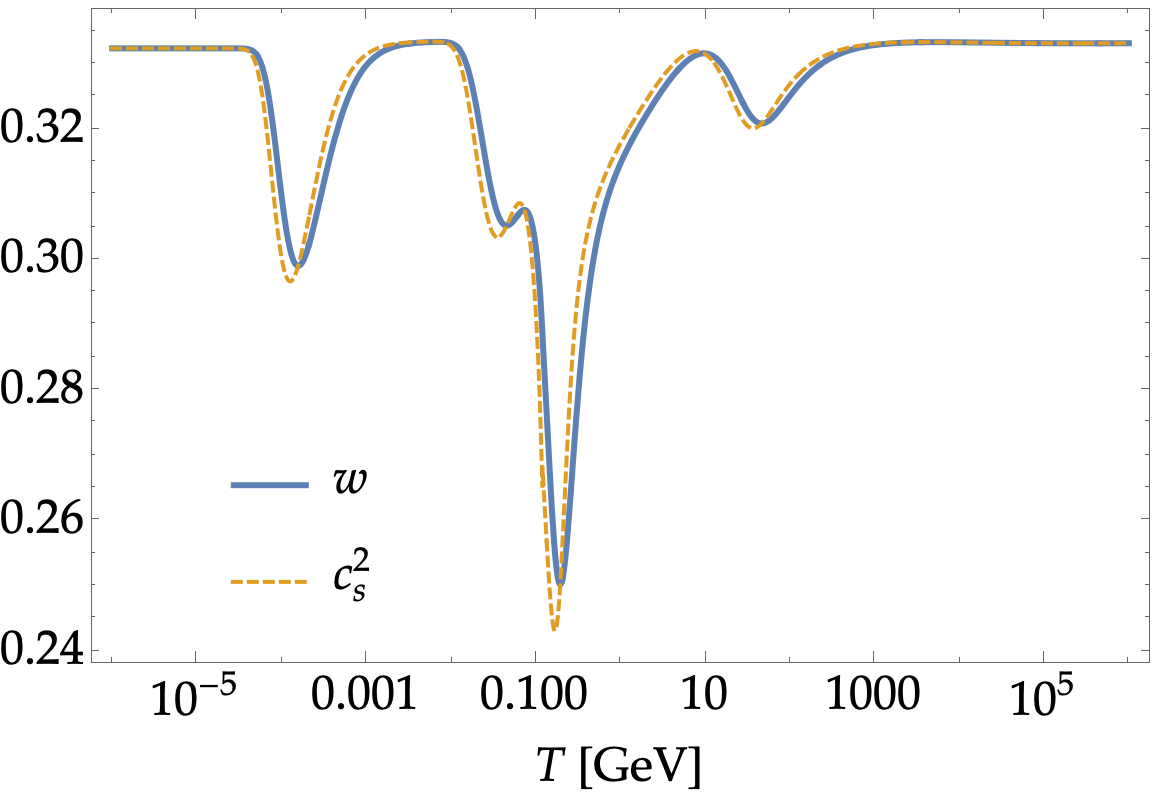

In [55]:
LogLinearPlot[{EoSw[T],cs2[T]},{T,10^-6,10^6},PlotRange->Full,PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, 
              FrameLabel->{Row[{T," [GeV]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet


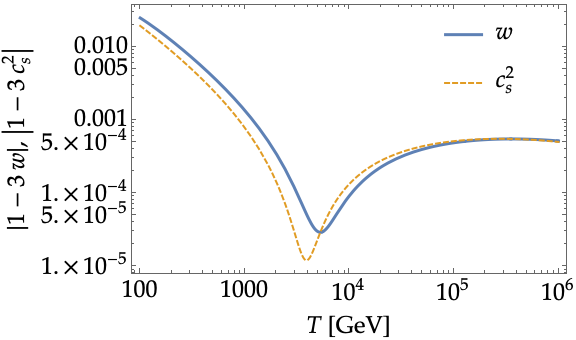

In [ ]:
LogLogPlot[{Abs[1-3EoSw[T]],Abs[1-3cs2[T]]},{T,100,10^6}, FrameLabel->{Row[{T, " [GeV]"}], Row[{Abs[1-3w], ", ", Abs[1-3 Subscript[c,s]^2]}]}, 
           PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.8,0.8}]]

In [56]:
Mpl = 2.435 10^18;
KinGeV = 1 / (1.160451812 10^4) 10^(-9)
Mpcinm = 3.08568 10^22;
GeVinminv = 10^9 / (1.97327 10^(-7))
GeVinMpcinv = GeVinminv Mpcinm

-14
8.61733 10
          15
5.06773 10
          38
1.56374 10

In [61]:
grho0 = grho[10^(-6)] // Quiet
gs0 = gs[10^(-6)] // Quiet
T0 = 2.725 KinGeV

3.383
3.931
          -13
2.34822 10

In [64]:
scalea[T_] = (gs0/gs[T])^(1/3) T0/T;
calH[T_] = Sqrt[scalea[T]^2rho[T]/3/Mpl^2] GeVinMpcinv (*Mpc^-1*);

In [66]:
Ti = 10^6;
rhoi = rho[Ti]
etai = 1/calH[Ti]
scaleai = scalea[Ti]

25
3.4384 10
          -14
5.84589 10
          -20
7.86804 10

In [70]:
etaf = 0.1;

{0.672271, Null}
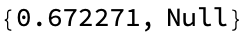

In [71]:
bgsol = NDSolve[{T'[eta] == -\[Pi]/Sqrt[10] gs0^(1/3)T0/Mpl 
                 (1+EoSw[T[eta]])grho[T[eta]]^(3/2)T[eta]^2 / (gs[T[eta]]^(1/3)
                                                                  (grhop[T[eta]]T[eta]+4grho[T[eta]])) GeVinMpcinv,
                 T[etai] == Ti},
                T[eta],{eta,etai,etaf}(*, WorkingPrecision->30*)][[1]]; // Quiet // AbsoluteTiming

In [72]:
Tsol[eta_] = T[eta] /. bgsol;
calHsol[eta_] = calH[Tsol[eta]];
asol[eta_] = scalea[Tsol[eta]];
EoSwsol[eta_] = EoSw[Tsol[eta]];
cs2sol[eta_] := cs2[Tsol[eta]];
grhosol[eta_] = grho[Tsol[eta]];
gssol[eta_] = gs[Tsol[eta]];

In [79]:
asolList = Table[{10^logeta,asol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],0.01}];
aint[eta_] = Interpolation[asolList][eta];
calHList = Table[{10^logeta,calHsol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],0.01}];
calHint[eta_] = Interpolation[calHList][eta];
EoSwList = Table[{10^logeta, EoSwsol[10^logeta] // Quiet},{logeta,Log10[etai],Log10[etaf],0.01}];
cs2List = Table[{10^logeta, cs2sol[10^logeta] // Quiet},{logeta,Log10[etai],Log10[etaf],0.01}];
EoSwint[eta_] = Interpolation[EoSwList][eta];
cs2int[eta_] = Interpolation[cs2List][eta];
grhoList = Table[{10^logeta,grhosol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],0.01}];
gsList = Table[{10^logeta,gssol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],0.01}];
grhoint[eta_] = Interpolation[grhoList][eta];
gsint[eta_] = Interpolation[gsList][eta];

-Graphics-
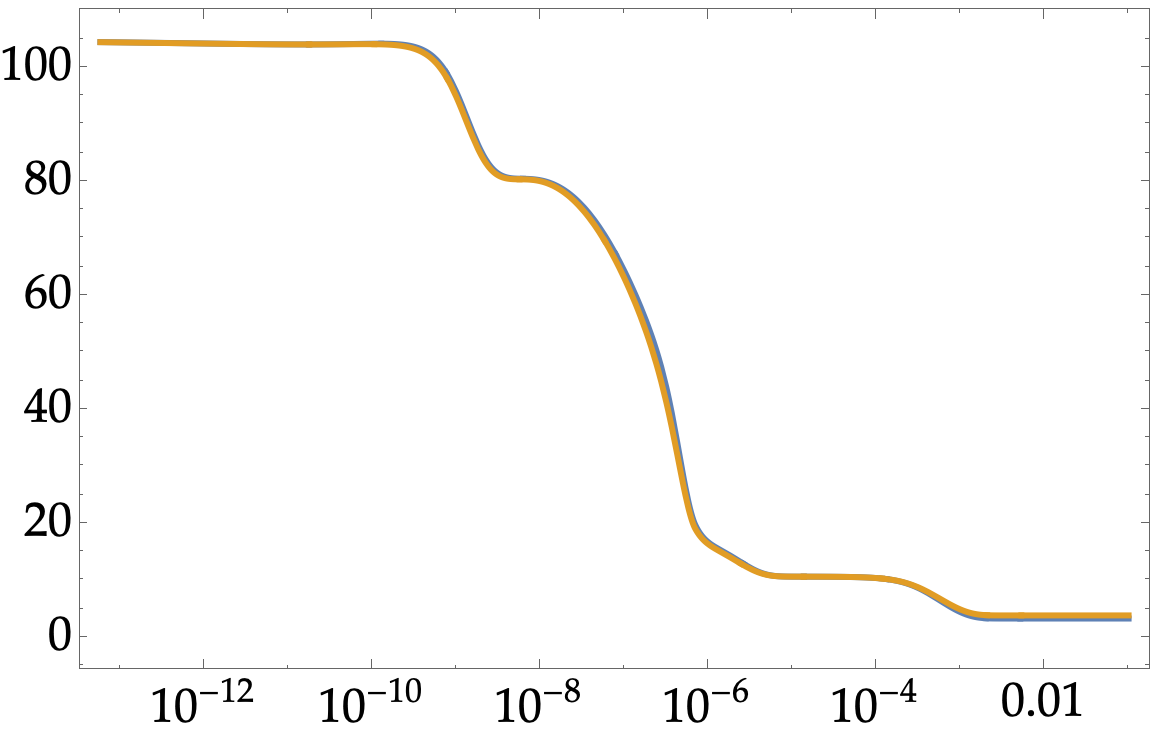

In [90]:
LogLinearPlot[{grhoint[eta],gsint[eta]},{eta,etai,etaf}]

-Graphics-
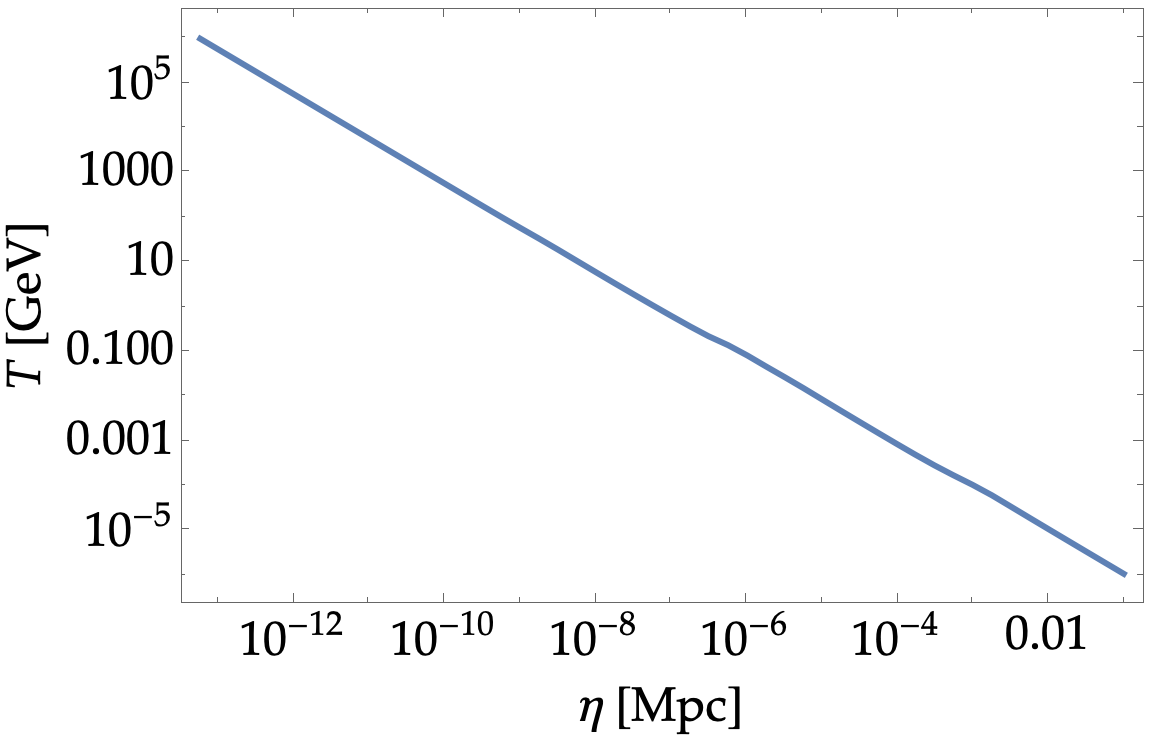

In [91]:
Tvseta = LogLogPlot[Tsol[eta],{eta,etai,etaf},FrameLabel->{Row[{\[Eta], " [Mpc]"}], Row[{T, " [GeV]"}]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/T_eta.pdf",Tvseta];

-Graphics-
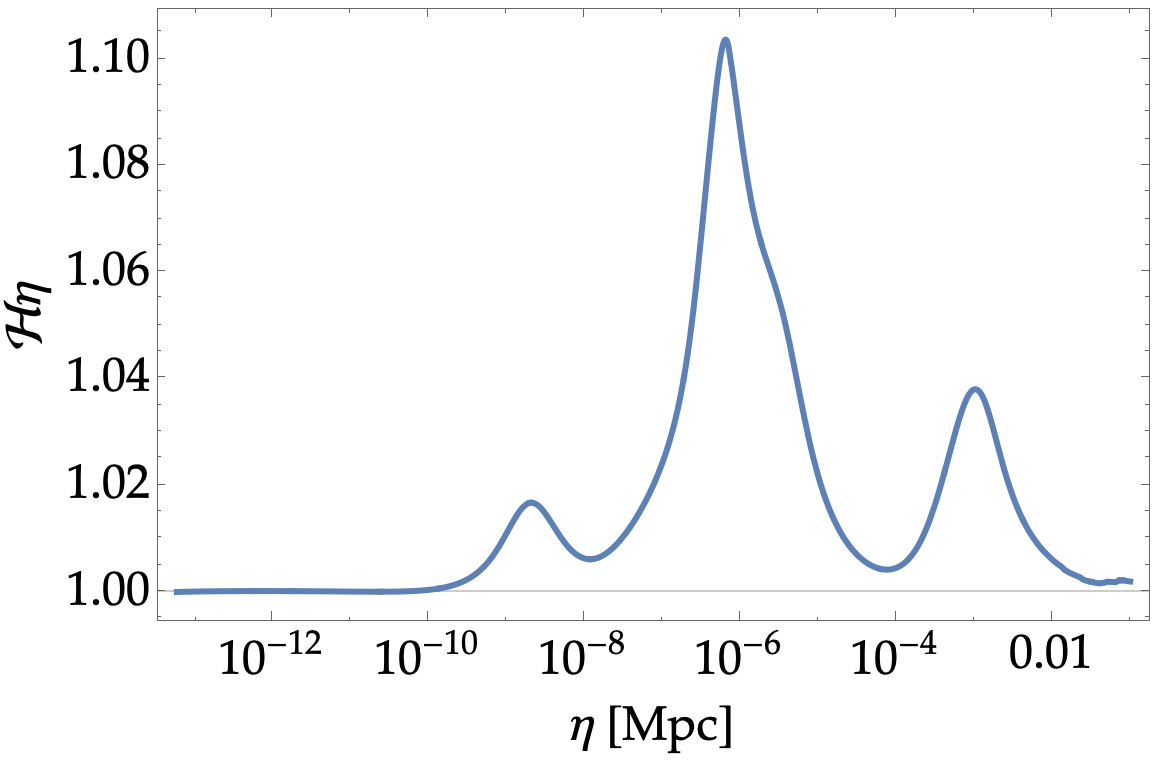

In [92]:
calHvseta = LogLinearPlot[calHint[eta]eta,{eta,etai,etaf},PlotRange->Full,GridLines->{None,{1}},FrameLabel->{Row[{\[Eta], " [Mpc]"}],\[ScriptCapitalH]\[Eta]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/calH_eta.pdf",calHvseta];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                               2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {w, c  }, 
                                                              s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
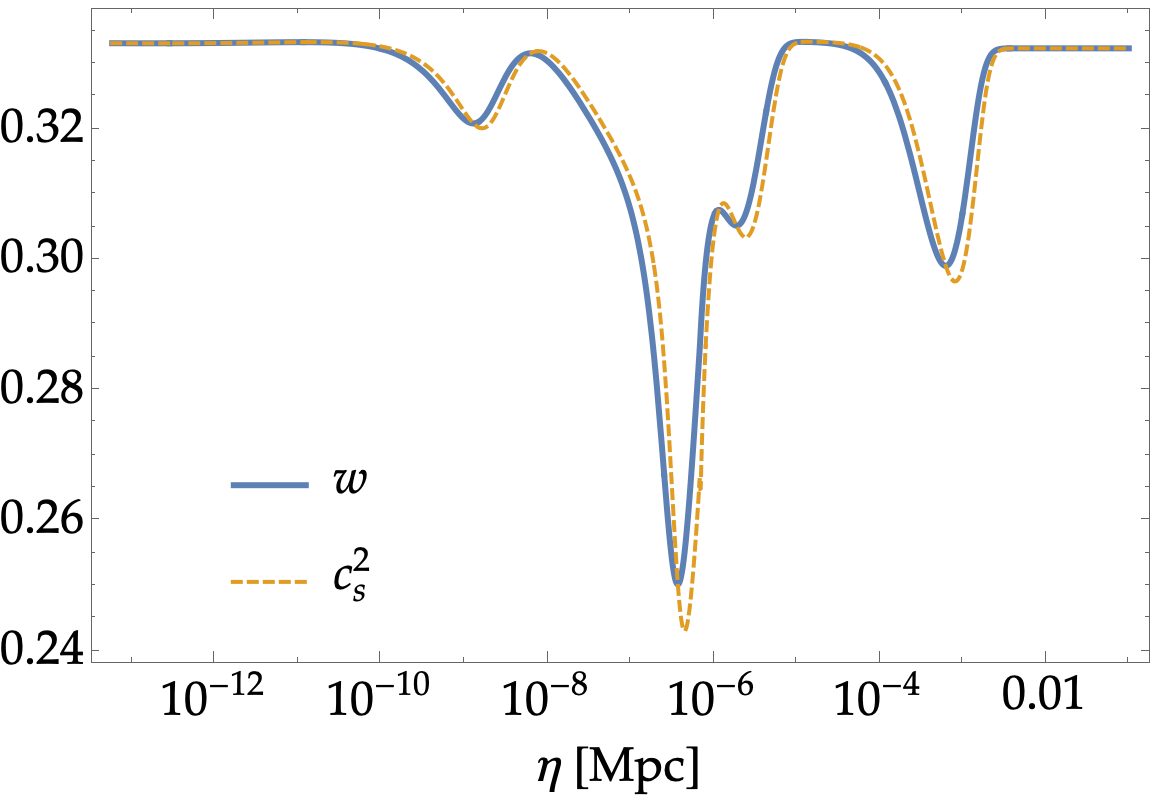

In [93]:
LogLinearPlot[{EoSwint[eta],cs2int[eta]},{eta,etai,etaf},PlotRange->Full, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}},
              FrameLabel->{Row[{\[Eta], " [Mpc]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet

## Monochromatic

{9.70205, Null}
{215.833, Null}
{135.116, Null}
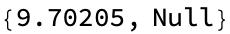
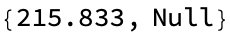
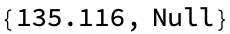

In [90]:
PhiList[x_] = Import["git/num/neutrino/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["git/num/neutrino/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["git/num/neutrino/G2List.wdx"]; // AbsoluteTiming

In [118]:
xi = 0.01;
xf = 400;
dx = \[Pi];

In [121]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [124]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [128]:
GreenGMode[eta_,etap_] = Table[(G1Mode[eta][[i]]G2Mode[etap][[i]]-G2Mode[eta][[i]]G1Mode[etap][[i]])
                               /(G1pMode[etap][[i]]G2Mode[etap][[i]]-G1Mode[etap][[i]]G2pMode[etap][[i]]),
                               {i,Length[G1Mode[eta]]}];

In [129]:
G1Norm[eta_] = Table[G1Mode[eta][[i]]/(G1pMode[eta][[i]]G2Mode[eta][[i]]-G1Mode[eta][[i]]G2pMode[eta][[i]]),
                    {i,Length[G1Mode[eta]]}];
G2Norm[eta_] = Table[G2Mode[eta][[i]]/(G1pMode[eta][[i]]G2Mode[eta][[i]]-G1Mode[eta][[i]]G2pMode[eta][[i]]),
                    {i,Length[G2Mode[eta]]}];

In [131]:
IG1[i_,x_] := kList[[i]] NIntegrate[aint[xp/kList[[i]]] G1Mode[xp/kList[[i]]][[i]]
                        (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwint[xp/kList[[i]]])
                         (PhiMode[xp][[i]] + kList[[i]]/calHint[xp/kList[[i]]] PhipMode[xp][[i]])^2), {xp,xi,x},
                        Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
IG2[i_,x_] := kList[[i]] NIntegrate[aint[xp/kList[[i]]] G2Mode[xp/kList[[i]]][[i]]
                        (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwint[xp/kList[[i]]])
                         (PhiMode[xp][[i]] + kList[[i]]/calHint[xp/kList[[i]]] PhipMode[xp][[i]])^2), {xp,xi,x},
                        Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
IG2bar[i_,x_] := IG1[i,x]^2 (G2Mode[(x-dx/4)/kList[[i]]][[i]]^2 + G2Mode[(x+dx/4)/kList[[i]]][[i]]^2)/2 + 
                    IG2[i,x]^2 (G1Mode[(x-dx/4)/kList[[i]]][[i]]^2 + G1Mode[(x+dx/4)/kList[[i]]][[i]]^2)/2 -
                    IG1[i,x]IG2[i,x] (G1Mode[(x-dx/4)/kList[[i]]][[i]]G2Mode[(x-dx/4)/kList[[i]]][[i]] +
                                        G1Mode[(x+dx/4)/kList[[i]]][[i]]G2Mode[(x+dx/4)/kList[[i]]][[i]])

In [113]:
(*IG[i_,x_] := NIntegrate[aint[xp/kList[[i]]] kList[[i]]^2 GreenGMode[x/kList[[i]],xp/kList[[i]]][[i]]
                        (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwint[xp/kList[[i]]])
                         (PhiMode[xp][[i]] + kList[[i]]/calHint[xp/kList[[i]]] PhipMode[xp][[i]])^2), {xp,xi,x},
                        Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
IG2bar[i_,x_] := (IG[i,x-dx/2]^2 (*+ IG[i,x-dx/4]^2*) + IG[i,x]^2 (*+ IG[i,x+dx/4]^2*) + IG[i,x+dx/2]^2)/3*)

In [111]:
Or0h2 = 4.2 10^(-5);
OGWcGbar[i_,x_] := 8/243 (aint[x/kList[[i]]]calHint[x/kList[[i]]])^(-2) (1-1/4)^2 IG2bar[i,x]

In [113]:
OGWG0h2bar[i_] := (gs0/gsint[xf/kList[[i]]])^(4/3) grhoint[xf/kList[[i]]]/grho0 Or0h2 OGWcGbar[i,xf]

In [114]:
kList[[100]]
OGWG0h2bar[100] // Quiet // AbsoluteTiming

97723.7
{1.1572, 0.0000181022}

{606.982, Null}
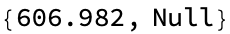

In [130]:
OGWG0h2barList = Table[{kList[[i]],OGWG0h2bar[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [132]:
Export["git/num/fast/OGW0h2mono.dat", OGWG0h2barList];

In [ ]:
OGWG0h2barList = Import["git/num/neutrino/OGWG0h2barList.dat"];

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
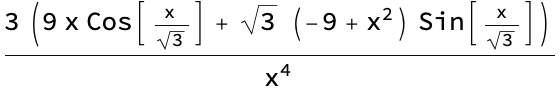

In [118]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [120]:
IsRad[i_,x_] := kList[[i]] NIntegrate[aint[xp/kList[[i]]] Sin[xp]
                        (2PhiRad[xp]^2 + 4/3/(1+EoSwint[xp/kList[[i]]])
                         (PhiRad[xp] + kList[[i]]/calHint[xp/kList[[i]]] PhiRadp[xp])^2), {xp,xi,x},
                        Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
IcRad[i_,x_] := kList[[i]] NIntegrate[aint[xp/kList[[i]]] Cos[xp]
                        (2PhiRad[xp]^2 + 4/3/(1+EoSwint[xp/kList[[i]]])
                         (PhiRad[xp] + kList[[i]]/calHint[xp/kList[[i]]] PhiRadp[xp])^2), {xp,xi,x},
                        Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
I2barRad[i_,x_] := (IsRad[i,x]^2+IcRad[i,x]^2)/2

In [125]:
OGWRad[i_,x_] := 8/243 (aint[x/kList[[i]]]calHint[x/kList[[i]]])^(-2) (1-1/4)^2 I2barRad[i,x]
OGW0Radh2[i_] := (gs0/gsint[xf/kList[[i]]])^(4/3) grhoint[xf/kList[[i]]]/grho0 Or0h2 OGWRad[i,xf]

In [127]:
OGW0Radh2[301] // Quiet // AbsoluteTiming

-6
{0.417464, 8.09549 10  }

{185.791, Null}
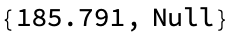

In [128]:
OGW0Radh2List = Table[{kList[[i]],OGW0Radh2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [133]:
Export["git/num/fast/OGW0h2RDmono.dat", OGW0Radh2List];

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00458333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00458333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{0, Small}]]}, {num, RDanal}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.2, 0.2}, Identity]]
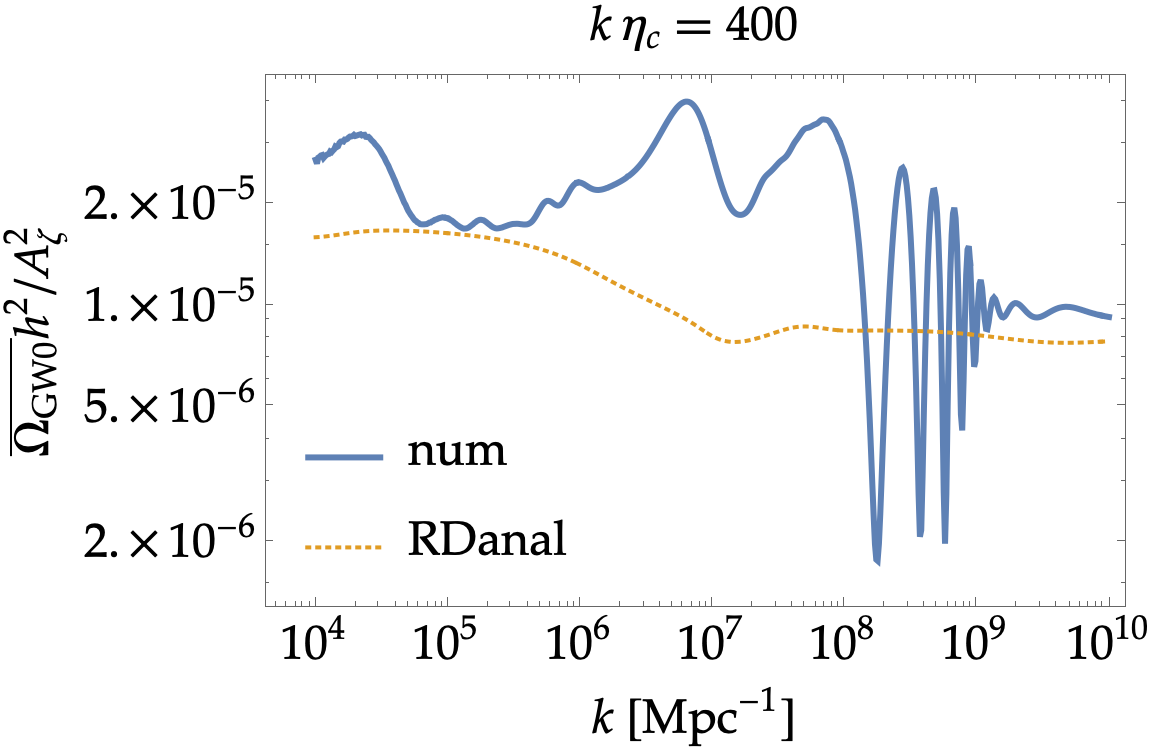

In [131]:
FigOGWG0h2bar = ListLogLogPlot[{OGWG0h2barList, OGW0Radh2List}, 
                               FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                           "/", Subscript[A,\[Zeta]]^2}], None},{Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}, 
                               PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotLegends->Placed[{"num", "RDanal"},{0.2,0.2}]]

## GW spectrum by monochromatic scalar

In [90]:
PhiList[x_] = Import["num/neutrino/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["num/neutrino/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["num/neutrino/G2List.wdx"]; // AbsoluteTiming

{15.3775, Null}
{407.396, Null}
{240.025, Null}

In [134]:
xi = 0.01;
xf = 400;
dx = \[Pi];

In [137]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [140]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [144]:
ItGen1[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G1Mode[etap][[iGW]] 
                                (2PhiMode[kList[[i1]] etap][[i1]] PhiMode[kList[[i2]] etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[kList[[i1]] etap][[i1]] + kList[[i1]]/calHint[etap] PhipMode[kList[[i1]] etap][[i1]])
                                (PhiMode[kList[[i2]] etap][[i2]] + kList[[i2]]/calHint[etap] PhipMode[kList[[i2]] etap][[i2]]) ), 
                                {etap,xi/Min[kList[[iGW]],kList[[i1]],kList[[i2]]],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
ItGen2[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G2Mode[etap][[iGW]] 
                                (2PhiMode[kList[[i1]] etap][[i1]] PhiMode[kList[[i2]] etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[kList[[i1]] etap][[i1]] + kList[[i1]]/calHint[etap] PhipMode[kList[[i1]] etap][[i1]])
                                (PhiMode[kList[[i2]] etap][[i2]] + kList[[i2]]/calHint[etap] PhipMode[kList[[i2]] etap][[i2]]) ), 
                                {etap,xi/Min[kList[[iGW]],kList[[i1]],kList[[i2]]],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
ItGen2bar[i_,eta_,ItG1_,ItG2_] := ItG1^2 (G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/2 + 
                                    ItG2^2 (G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/2 -
                                    ItG1 ItG2 (G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]] +
                                            G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]])

In [158]:
OGWcMonobar[is_,iGW_,eta_] := 8/243 (kList[[iGW]]/asol[eta]/calHsol[eta])^2 UnitStep[1-kList[[iGW]]/2/kList[[is]]]*
    (1-(kList[[iGW]]/2/kList[[is]])^2)^2 (kList[[is]]/kList[[iGW]])^2 ItGen2bar[iGW,eta,ItGen1[is,is,iGW,eta],ItGen2[is,is,iGW,eta]]

In [209]:
icancel = 426;
kcancel = kList[[icancel]]
kList[[icancel-100]]
kList[[icancel+31]] / kcancel

8
1.77828 10
          7
1.77828 10
2.04174

In [163]:
OGWcMonobar[icancel,icancel,xf/kList[[icancel]]] // AbsoluteTiming

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                 -21              -26
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {8.61085 10  }. NIntegrate obtained 3.28573 10    and 8.3605 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                 -22               -27
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {8.61085 10  }. NIntegrate obtained 1.27626 10    and 3.34006 10    for the integral and error estimates.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -6
Input value {2.24495 10  } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -6
Input value {2.24495 10  } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -6
Input value {2.24495 10  } lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

{0.901773, 0.0528604}

In [167]:
OGWcMonobarList = Table[{kList[[i]]/kList[[icancel]], OGWcMonobar[icancel,i,xf/kList[[icancel]]] // Quiet}, {i,icancel-100,icancel+31}]; // AbsoluteTiming

{108.087, Null}

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
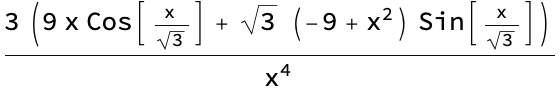

In [202]:
PhiRD[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRDp[x_] = D[PhiRD[x],x] // Simplify

In [204]:
ItRDs[k1_,k2_,kGW_,eta_] := kGW NIntegrate[etap Sin[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                (PhiRD[k1 etap] + k1 etap PhiRDp[k1 etap])(PhiRD[k2 etap] + k2 etap PhiRDp[k2 etap]) ), 
                                {etap,xi/Min[kGW,k1,k2],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
ItRDc[k1_,k2_,kGW_,eta_] := kGW NIntegrate[etap Cos[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                (PhiRD[k1 etap] + k1 etap PhiRDp[k1 etap])(PhiRD[k2 etap] + k2 etap PhiRDp[k2 etap]) ), 
                                {etap,xi/Min[kGW,k1,k2],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}]
IRD2bar[k1_,k2_,kGW_,eta_] := (ItRDs[k1,k2,kGW,eta]^2 + ItRDc[k1,k2,kGW,eta]^2)/2;

In [207]:
OGWcRDMonobar[ks_,kGW_,eta_] := 8/243 kGW^2 UnitStep[1-kGW/2/ks] (1-(kGW/2/ks)^2)^2 (ks/kGW)^2 IRD2bar[ks,ks,kGW,eta];

In [213]:
OGWcRDMonobar[kcancel,kcancel,xf/kcancel] // AbsoluteTiming

{0.105585, 0.482908}

{10.4575, Null}
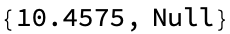

In [214]:
OGWcRDMonobarList = Table[{10^logk / kcancel, OGWcRDMonobar[kcancel,10^logk,xf/kcancel] // Quiet}, 
                    {logk,Log10[kcancel]-1,Log10[2kcancel],0.01}]; // AbsoluteTiming

In [217]:
OGWcRDMonoInt[rk_] = Interpolation[OGWcRDMonobarList][rk];

-Graphics-
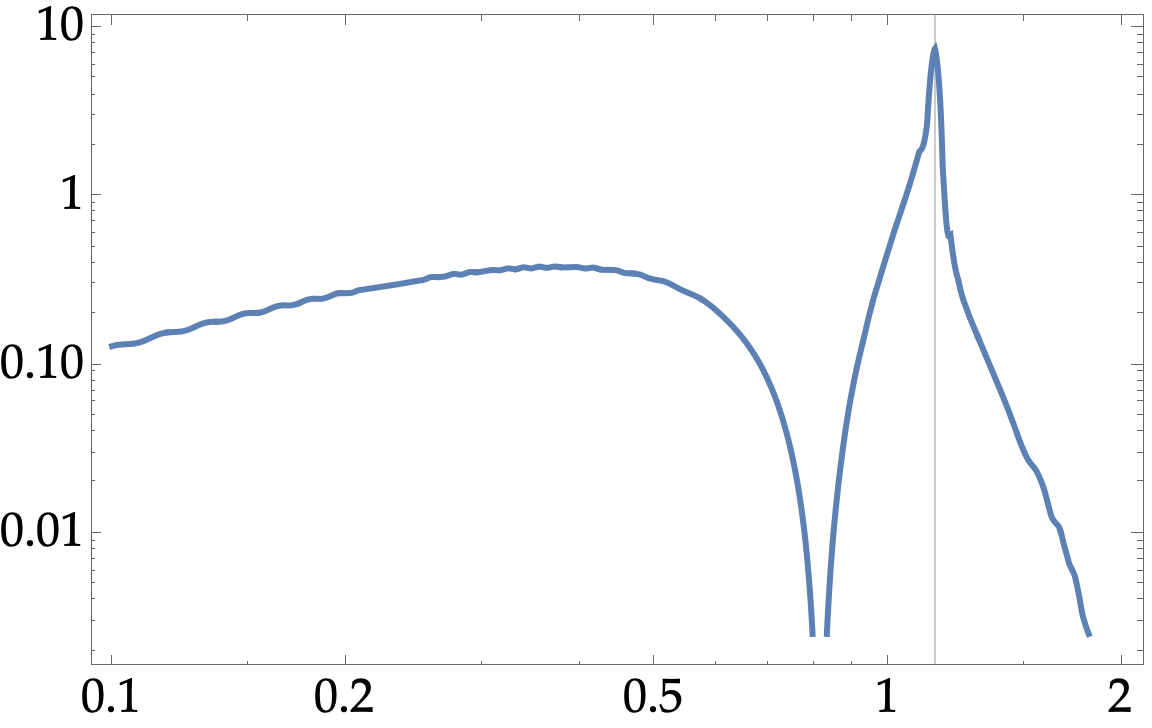

In [219]:
LogLogPlot[OGWcRDMonoInt[k], {k,0.1,2}, GridLines->{{2/Sqrt[3]},None}]

In [265]:
1 - OGWcRDMonobarList[[107,1]] / (2/Sqrt[3])

0.0056698

In [255]:
NIntegrate[OGWcRDMonoInt[rk]/rk, {rk,0.1,2}]
Table[Sum[OGWcRDMonobarList[[i,2]] 0.01 Log[10] istep, {i,1,Length[OGWcRDMonobarList],istep}], {istep,20}]

0.982247
{0.983729, 1.09635, 0.873578, 0.830538, 0.940177, 0.772161, 1.03425, 0.923944, 0.737188, 
 
>   0.703421, 0.689805, 0.744174, 1.11025, 0.664643, 1.47908, 0.638719, 0.921079, 
 
>   0.794163, 0.61917, 0.788413}

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00733333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00733333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{0, Small}]]}, {num, RD}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.2, 0.2}, Identity]]
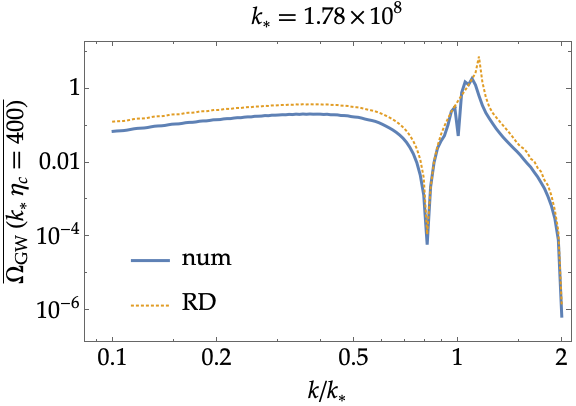

In [192]:
FigOGWcMonobar = ListLogLogPlot[{OGWcMonobarList, OGWcRDMonobarList}, 
                                FrameLabel->{{OverBar[Subscript[\[CapitalOmega],GW](Subscript[k,"\[RawStar]"]Subscript[\[Eta],c]==400)], None}, 
                                {Row[{k,"/",Subscript[k,"\[RawStar]"]}], Subscript[k,"\[RawStar]"]==1.78 10^8}}, 
                                PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, 
                                PlotLegends->Placed[{"num", "RD"}, {0.2,0.2}]]

In [193]:
Export["neutrino/OGWcMonobar178e6.pdf", FigOGWcMonobar];

## convolution

{9.84945, Null}
{222.58, Null}
{145.9, Null}
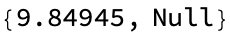
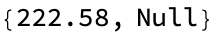
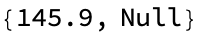

In [91]:
PhiList[x_] = Import["num/neutrino/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["num/neutrino/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["num/neutrino/G2List.wdx"]; // AbsoluteTiming

In [94]:
xi = 0.01;
xc = 400;
xf = 1000;
dx = \[Pi];
dlogk = 0.01 Log[10]

0.0230259

In [99]:
PhiMode[x_] = Table[UnitStep[x-xi,xf-x] PhiList[x][[i,2]], {i,Length[PhiList[x]]}];
PhipMode[x_] = Table[UnitStep[x-xi,xf-x] D[PhiList[x][[i,2]],x],{i,Length[PhiList[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [130]:
G1Mode[eta_] = Table[G1List[eta][[i,2]]/kList[[i]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [134]:
kList[[201]]

6
1. 10

-Graphics-
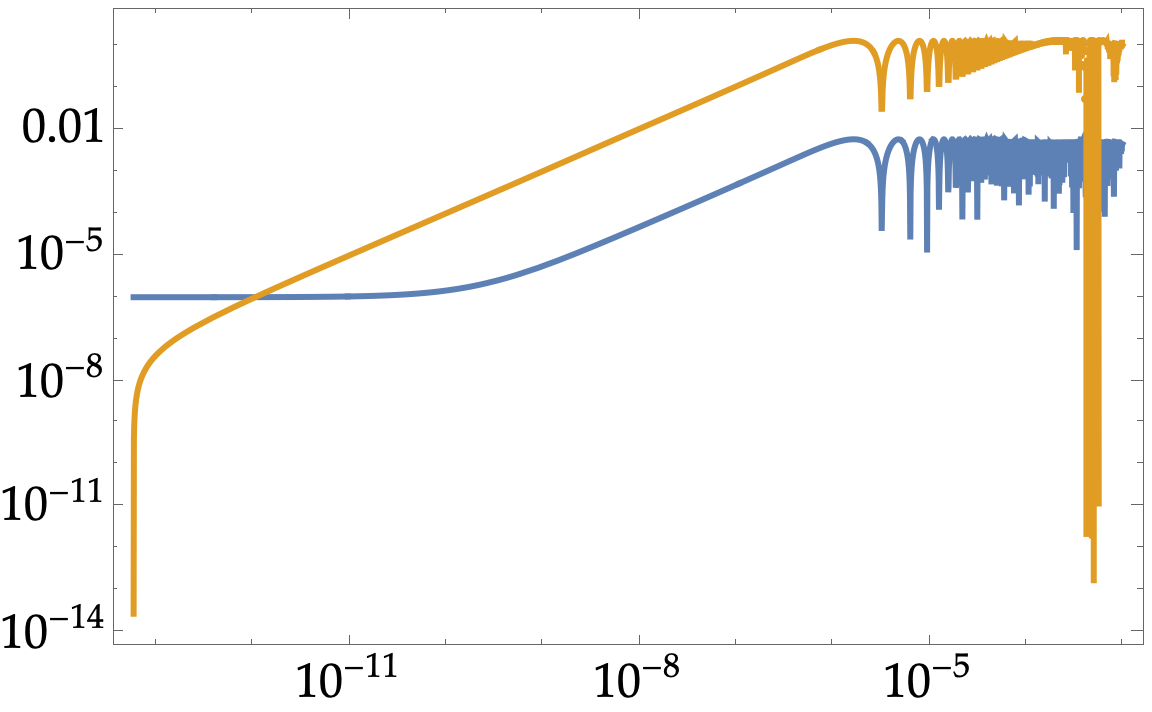

In [137]:
LogLogPlot[{Abs[G1Mode[x][[201]]], Abs[G2Mode[x][[201]]]},{x,etai,xf/kList[[201]]}]

In [138]:
ItGen1[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G1Mode[etap][[iGW]] 
                                (2PhiMode[kList[[i1]] etap][[i1]] PhiMode[kList[[i2]] etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[kList[[i1]] etap][[i1]] + kList[[i1]]/calHint[etap] PhipMode[kList[[i1]] etap][[i1]])
                                (PhiMode[kList[[i2]] etap][[i2]] + kList[[i2]]/calHint[etap] PhipMode[kList[[i2]] etap][[i2]]) ), 
                                {etap,xi/kList[[iGW]],eta}, 
                                Method->{"GlobalAdaptive", "SymbolicProcessing"->0} ,
                                WorkingPrecision->30]
ItGen2[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G2Mode[etap][[iGW]] 
                                (2PhiMode[kList[[i1]] etap][[i1]] PhiMode[kList[[i2]] etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[kList[[i1]] etap][[i1]] + kList[[i1]]/calHint[etap] PhipMode[kList[[i1]] etap][[i1]])
                                (PhiMode[kList[[i2]] etap][[i2]] + kList[[i2]]/calHint[etap] PhipMode[kList[[i2]] etap][[i2]]) ), 
                                {etap,xi/kList[[iGW]],eta}, 
                                Method->{"GlobalAdaptive", "SymbolicProcessing"->0} ,
                                WorkingPrecision->30]
ItGen2bar[i_,eta_,ItG1_,ItG2_] := ItG1^2 (G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/2 + 
                                    ItG2^2 (G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/2 -
                                    ItG1 ItG2 (G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]] +
                                            G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]])

In [109]:
iMax = Length[kList]

601

In [113]:
ItG1 = ItGen1[361,361,361,xf/kList[[361]]] // Quiet // AbsoluteTiming
ItG2 = ItGen2[361,361,361,xf/kList[[361]]] // Quiet // AbsoluteTiming
ItGen2bar[361,xf/kList[[361]],ItG1,ItG2] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000250991} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000250991} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000250991} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

-26
{1.54562, 3.48600194972382427110897786252 10   }
                                           -20
{1.2632, 1.23246036778745124756568739889 10   }
                               -56
{0.070987, {1.31476, 4.42371 10   }}

In [134]:
i1step = 5;
i2step = 5;
(*Di = 100;*)
Dlogk1 = dlogk i1step
Dlogk2 = dlogk i2step
(*2Di/istep + 1*)
Select[Flatten[Table[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[300]] <= kList[[i1]]+kList[[i2]],
                    {i1,i2}, {0}], {i1,(*Max[300-Di,1]*)1,(*Max[300+Di,iMax]*)iMax,i1step}, 
                    {i2,(*Max[300-Di,1]*)1,(*Min[300+Di,iMax]*)iMax,i2step}], 1], #[[1]] != 0&] // Length
OGWc[i_,eta_] := 8/243 Dlogk1 Dlogk2 / (aint[eta]calHint[eta])^2 *
    Sum[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[i]] <= kList[[i1]]+kList[[i2]],
        ( kList[[i1]]^2 - (kList[[i]]^2-kList[[i2]]^2+kList[[i1]]^2)^2/4/kList[[i]]^2 )^2 / kList[[i1]]/kList[[i2]] *
            ItGen2bar[i, eta, ItGen1[i1,i2,i,eta], ItGen2[i1,i2,i,eta] ],
        0], {i1,(*Max[i-Di,1]*)1,(*Min[i+Di,iMax]*)iMax,i1step}, {i2,(*Max[i-Di,1]*)1,(*Min[i+Di,iMax]*)iMax,i2step}]

0.115129
0.115129
395

In [133]:
kList[[41]]

25118.9

In [142]:
OGWc[41,xc/kList[[41]]] // Quiet // AbsoluteTiming

{745.97, 0.633771}

In [165]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*2 3*)

{725.067, 54.2864}

In [120]:
Amp = OGWc[iMax,xf/kList[[iMax]]] // Quiet // AbsoluteTiming (*2 3*)

{338.917, 0.193678}

In [174]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*2 5*)

{435.469, 10308.8}

In [180]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*2 3 30*)

{2584.81, 0.71342}

In [140]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*2 5 30*)

{1641.19, 0.716228}

In [149]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*5 5 30*)

{695.375, 0.723747}

In [131]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*1 1 30*)

{15241.9, 0.709112}

In [148]:
Amp = OGWc[161,xf/kList[[161]]] // Quiet // AbsoluteTiming (*2 5 30*)

NIntegrate::precw:                                                                                                                                                                                                                                                                                                                                                                                                                                                                          10000. UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap]                                                                                           398107. UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap]
                                                                                                                                                                                                                                                                                                                                                                                4 (UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap] + ------------------------------------------------------------------------------------------) (UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ---------------------------------------------------------------------------------------------)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         -14                                                                                                                                                                                    -14
                                                                                        -14                                                                          -14                                                                                                                                                                                                                                                                                                               InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]                                                                                                                          InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]
The precision of the argument function (InterpolatingFunction[{{5.8458893888674088614 10   , 0.0025118864315095824728}}, <>][etap] InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap] (2 UnitStep[400 - 398107. etap] UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------)) is less than WorkingPrecision (30.).
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            -14
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   3 (1 + InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap])

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                                                                                                                                                           -13                                                                                         -17
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {0.00065970968129619608626445257557890701048372972638965810317372013896802357676975920}. NIntegrate obtained -2.2133711893769972083411870873154619157836687346085734581660320831919518995947864 10    and 1.6033496576735144271334642271113206293292754121171173354808366746505284574832557 10    for the integral and error estimates.

NIntegrate::precw:                                                                                                                                                                                                                                                                                                                                                                                                                                                                          10000. UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap]                                                                                           398107. UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap]
                                                                                                                                                                                                                                                                                                                                                                                4 (UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap] + ------------------------------------------------------------------------------------------) (UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ---------------------------------------------------------------------------------------------)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         -14                                                                                                                                                                                    -14
                                                                                        -14                                                                          -14                                                                                                                                                                                                                                                                                                               InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]                                                                                                                          InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]
The precision of the argument function (InterpolatingFunction[{{5.8458893888674088614 10   , 0.0025118864315095824728}}, <>][etap] InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap] (2 UnitStep[400 - 398107. etap] UnitStep[400 - 10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10000. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------)) is less than WorkingPrecision (30.).
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            -14
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   3 (1 + InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap])

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                                                                                                                                                           -17                                                                                         -21
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {0.00065970968129619608626445257557890701048372972638965810317372013896802357676975920}. NIntegrate obtained -1.9664707667871827408165954237599105464799949816164499473754162003432102313867113 10    and 1.4247879933113203834196538746805408574832620076536915486075514040429649848471835 10    for the integral and error estimates.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.00100278} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.00100278} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.00100278} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

NIntegrate::precw:                                                                                                                                                                                                                                                                                                                                                                                                                                                                              10471.3 UnitStep[400 - 10471.3 etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10471.3 etap]                                                                                           398107. UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap]
                                                                                                                                                                                                                                                                                                                                                                                  4 (UnitStep[400 - 10471.3 etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10471.3 etap] + ---------------------------------------------------------------------------------------------) (UnitStep[400 - 398107. etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ---------------------------------------------------------------------------------------------)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               -14                                                                                                                                                                                     -14
                                                                                        -14                                                                          -14                                                                                                                                                                                                                                                                                                                     InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]                                                                                                                           InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap]
The precision of the argument function (InterpolatingFunction[{{5.8458893888674088614 10   , 0.0025118864315095824728}}, <>][etap] InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap] (2 UnitStep[400 - 398107. etap] UnitStep[400 - 10471.3 etap] InterpolatingFunction[{{0.01, 1000.}}, <>][10471.3 etap] InterpolatingFunction[{{0.01, 1000.}}, <>][398107. etap] + ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------)) is less than WorkingPrecision (30.).
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 -14
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        3 (1 + InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][etap])

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::precw will be suppressed during this calculation.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                                                                                                                                                           -14                                                                                         -17
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {0.00062832547293120557580436383053387831834482456755567765660558053686151639008981476}. NIntegrate obtained -9.8414733701559061753330993971799091629363278447036831672693282158173499720231929 10    and 1.4139367770404875043328210082532698431758511755022579987995822052046647023351750 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::slwcon will be suppressed during this calculation.

Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.: Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.

Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.: Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.

Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.: Integral and error estimates are 0 on all integration subregions. Try increasing the value of the MinRecursion option. If value of integral may be 0, specify a finite value for the AccuracyGoal option.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::izero will be suppressed during this calculation.

{1653.83, 0.716228}

In [407]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*1 1*)

{4277.95, 8.70348}

In [521]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*1 5*)

{872.801, 3.42996}

In [559]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*1 3*)

{1401.73, 11.6936}

In [568]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*2 3*)

{708.729, 21.7339}

In [577]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*2 5*)

{422.076, 6.01022}

In [586]:
Amp = OGWc[300,xf/kList[[300]]] // Quiet // AbsoluteTiming (*3 5*)

{280.936, 0.84883}

Part::pkspec1: The expression i cannot be used as a part specification.

Part::pkspec1: The expression i cannot be used as a part specification.

-4
1.19904 × 10
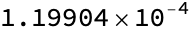

In [522]:
Amp[[2]] (gs0/gsint[xf/kList[[i]]])^(4/3) grhoint[xf/kList[[i]]]/grho0 Or0h2 /. {i->300} // ScientificForm

In [143]:
Or0h2 = 4.2 10^(-5);
OGW0h2[i_] := (gs0/gsint[xc/kList[[i]]])^(4/3) grhoint[xc/kList[[i]]]/grho0 Or0h2 OGWc[i,xc/kList[[i]]];

In [145]:
OGW0h2[41] // Quiet // AbsoluteTiming

{779.648, 0.0000266184}

{50369.8, Null}
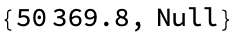

In [146]:
OGW0h2List = Table[{kList[[i]], OGW0h2[i] // Quiet}, {i,1,iMax,10}]; // AbsoluteTiming

In [147]:
50369/3600 // N

13.9914

-Graphics-
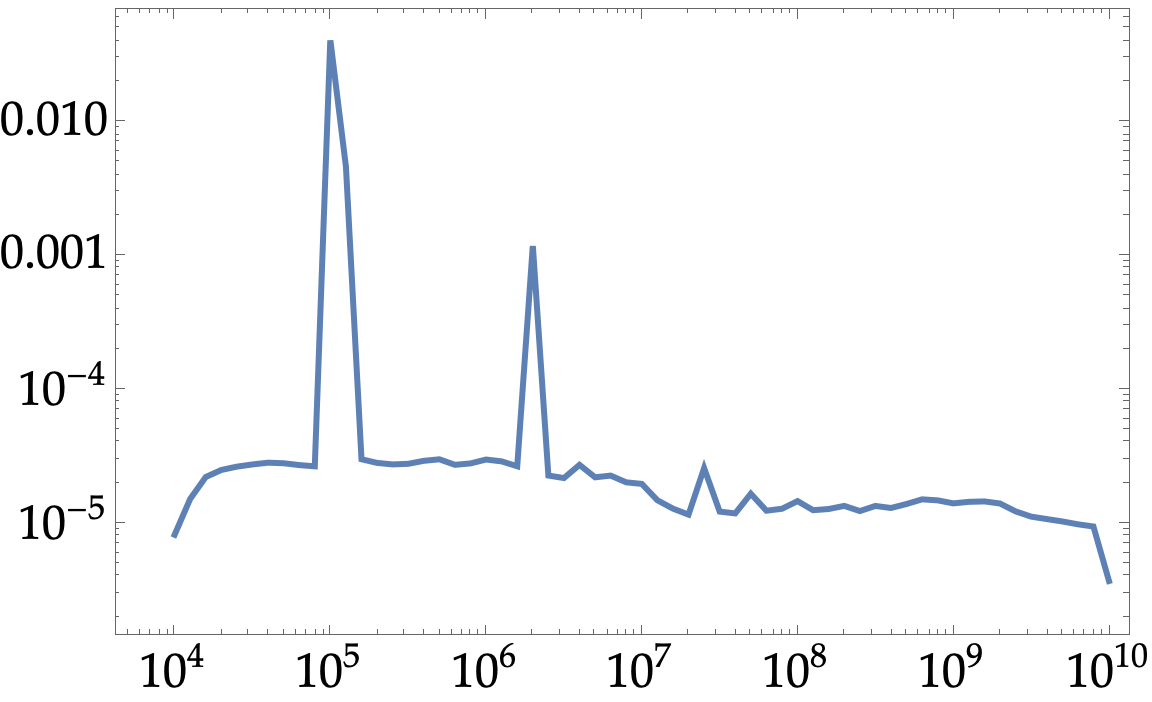

In [148]:
ListLogLogPlot[OGW0h2List]

In [131]:
OGW0h2List[[5]]
kList[[41]]

{25118.9, 5.33617}
25118.9

In [149]:
Export["num/fast/OGW0h2scalarcut.dat", OGW0h2List];

In [121]:
OGW0h2List = Import["num/fast/OGW0h2kint2530.dat"];

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
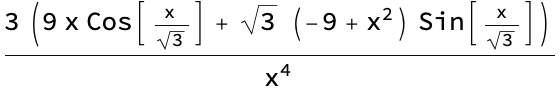

In [91]:
PhiRD[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRDp[x_] = D[PhiRD[x],x] // Simplify

In [105]:
ItRDs[k1_,k2_,kGW_,eta_] := kGW NIntegrate[aint[etap] Sin[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                4/3/(1+EoSwint[etap])(PhiRD[k1 etap] + k1/calHint[etap] PhiRDp[k1 etap])
                                (PhiRD[k2 etap] + k2/calHint[etap] PhiRDp[k2 etap]) ), 
                                {etap,xi/Min[kGW,k1,k2],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}
                                , WorkingPrecision->30]
ItRDc[k1_,k2_,kGW_,eta_] := kGW NIntegrate[aint[etap] Cos[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                4/3/(1+EoSwint[etap])(PhiRD[k1 etap] + k1/calHint[etap] PhiRDp[k1 etap])
                                (PhiRD[k2 etap] + k2/calHint[etap] PhiRDp[k2 etap]) ), 
                                {etap,xi/Min[kGW,k1,k2],eta}, Method->{"GlobalAdaptive", "SymbolicProcessing"->0}
                                , WorkingPrecision->30]
IRD2bar[k1_,k2_,kGW_,eta_] := (ItRDs[k1,k2,kGW,eta]^2 + ItRDc[k1,k2,kGW,eta]^2)/2;

In [108]:
IRD2bar[10^8,10^8,10^7,xf/10^7] // Quiet // AbsoluteTiming

-28
{2.15676, 7.5738733382543657848801461253 10   }

In [171]:
i1step = 5;
i2step = 5;
(*Di = 100;*)
Dlogk1 = dlogk i1step
Dlogk2 = dlogk i2step
Dlog10k1 = Dlogk1/Log[10]
Dlog10k2 = Dlogk2/Log[10]
(*2Di/istep + 1*)
Select[Flatten[Table[If[Abs[10^logk1-10^logk2] <= 10^7 <= 10^logk1+10^logk2,
                    {10^logk1,10^logk2}, {0}], {logk1,(*Max[300-Di,1]*)4,(*Max[300+Di,iMax]*)10,Dlog10k1}, 
                    {logk2,(*Max[300-Di,1]*)4,(*Min[300+Di,iMax]*)10,Dlog10k2}], 1], #[[1]] != 0&] // Length
OGWcRD[k_,eta_] := 8/243 Dlogk1 Dlogk2 / (aint[eta]calHint[eta])^2 *
    Sum[If[Abs[10^logk1-10^logk2] <= k <= 10^logk1+10^logk2,
        ( 10^(2logk1) - (k^2-10^(2logk2)+10^(2logk1))^2/4/k^2 )^2 / 10^logk1 / 10^logk2 
        IRD2bar[10^logk1,10^logk2,k,eta],
        0], {logk1,(*Max[i-Di,1]*)4,(*Min[i+Di,iMax]*)10,Dlog10k1}, 
        {logk2,(*Max[i-Di,1]*)4,(*Min[i+Di,iMax]*)10,Dlog10k2}]

0.115129
0.115129
0.05
0.05
451

In [181]:
OGWcRD[10^7,xf/10^7] // Quiet // AbsoluteTiming

{437.296, 0.409966}

In [91]:
Or0h2 = 4.2 10^(-5);
OGW0RDh2[k_] := (gs0/gsint[xf/k])^(4/3) grhoint[xf/k]/grho0 Or0h2 OGWcRD[k,xf/k];

In [185]:
OGW0RDh2[10^7] // Quiet // AbsoluteTiming

{359.083, 0.0000143306}

{23404.1, Null}
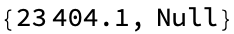

In [187]:
OGW0RDh2List = Table[{10^logk, OGW0RDh2[10^logk] // Quiet}, {logk,4,10,0.1}]; // AbsoluteTiming

-Graphics-
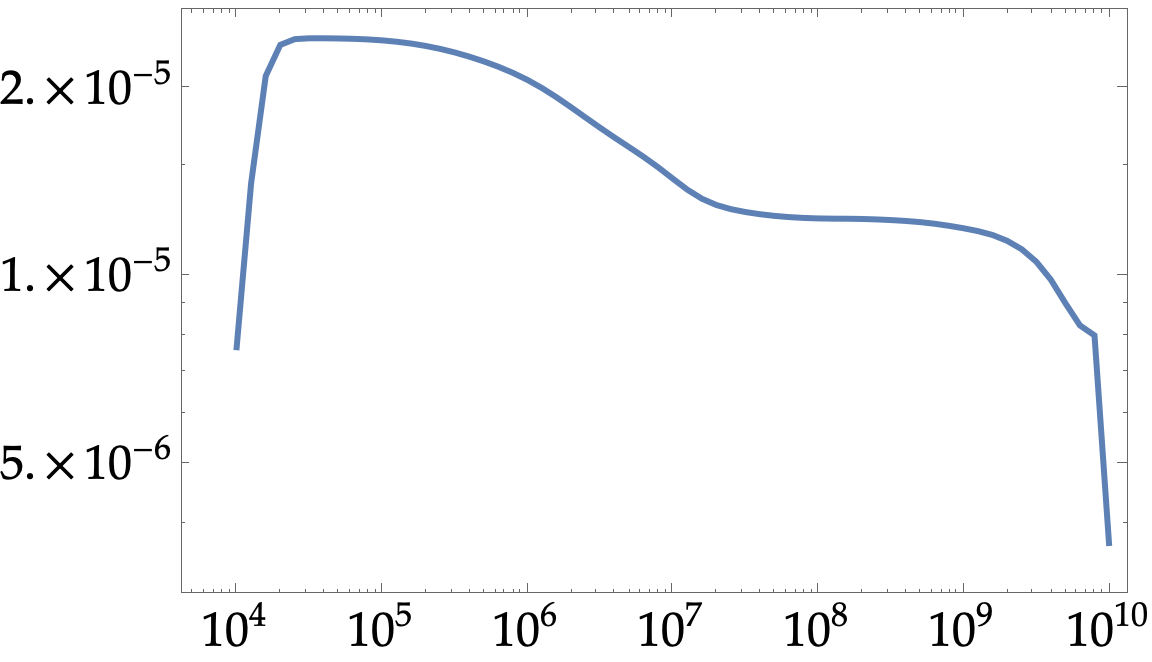

In [188]:
ListLogLogPlot[OGW0RDh2List]

In [189]:
Export["num/fast/OGW0h2RD.dat", OGW0h2RDList];

In [150]:
OGW0RDh2Anal[k_] = (gs0/gsint[1/k])^(4/3) grhoint[1/k]/grho0 Or0h2 0.8222;

In [248]:
OGW0h2List = Import["num/fast/OGW0h2kint2530.dat"];

In [151]:
OGW0h2Ueda = Transpose[Import["num/fast/Ueda_gw_qcd.dat"]].DiagonalMatrix[{1,10^4}];
OGW0h2RDUeda = Transpose[Import["num/fast/Ueda_gw_rd.dat"]].DiagonalMatrix[{1,10^4}];

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.011], 
 
>        RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]]}, {PT}, 
 
>      LegendMarkers -> {{False, Automatic}}, Joined -> {True}, 
 
>      LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>     {0.3, 0.2}, Identity]], Placed[LineLegend[{Directive[Opacity[1.], 
 
>       AbsoluteThickness[1.6], RGBColor[0.882353, 0.611765, 0.141176], 
 
>       Dashing[{0, Small}]]}, {RD anal}, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.3, 0.2}, Identity]]
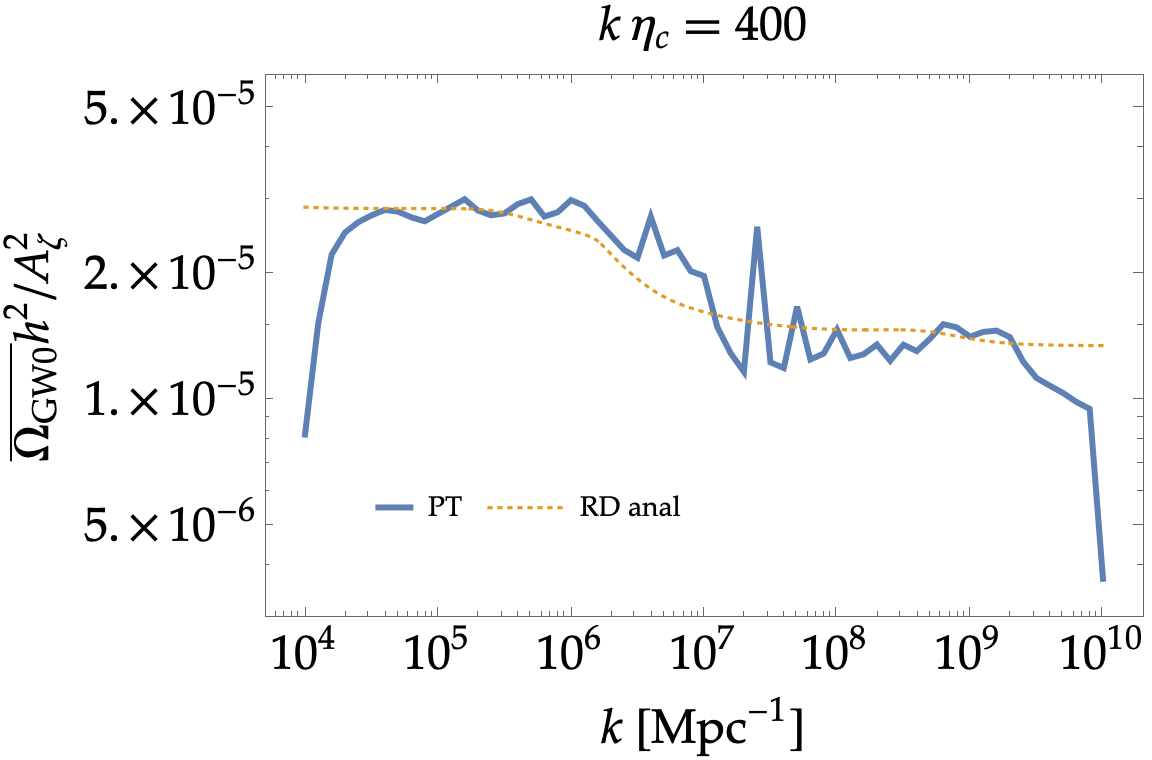

In [155]:
FigOGW0h2wAnal = 
    Show[ListLogLogPlot[Select[OGW0h2List,#[[2]]<4 10^-4&], 
            PlotLegends->Placed[LineLegend[{"PT"}, 
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}],
            PlotRange->{{5 10^3,2 10^10},{3 10^-6,0.6 10^-4}},
            FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                    "/", Subscript[A,\[Zeta]]^2}], None},
                        {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}], 
        LogLogPlot[OGW0RDh2Anal[k],{k,10^4,10^10}, PlotStyle->{Color[[2]],Dotted},
            PlotLegends->Placed[LineLegend[{"RD anal"},
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}]
    ]]

In [265]:
Export["fast/OGW0h2wAnal.pdf", FigOGW0h2wAnal];

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00458333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00458333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[PointSize[0.00458333], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[2], 
 
>       Dashing[{Small, Small}]], Directive[PointSize[0.00458333], 
 
>       RGBColor[0.922526, 0.385626, 0.209179], AbsoluteThickness[2], 
 
>       Dashing[{0, Small}]]}, {PT (×13), RD (×15), PT (Ueda), RD (Ueda)}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True}, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], 
 
>     LegendLayout -> {Column, {Automatic, 5}}, LegendMarkerSize -> 20], {0.3, 0.3}, 
 
>    Identity]]
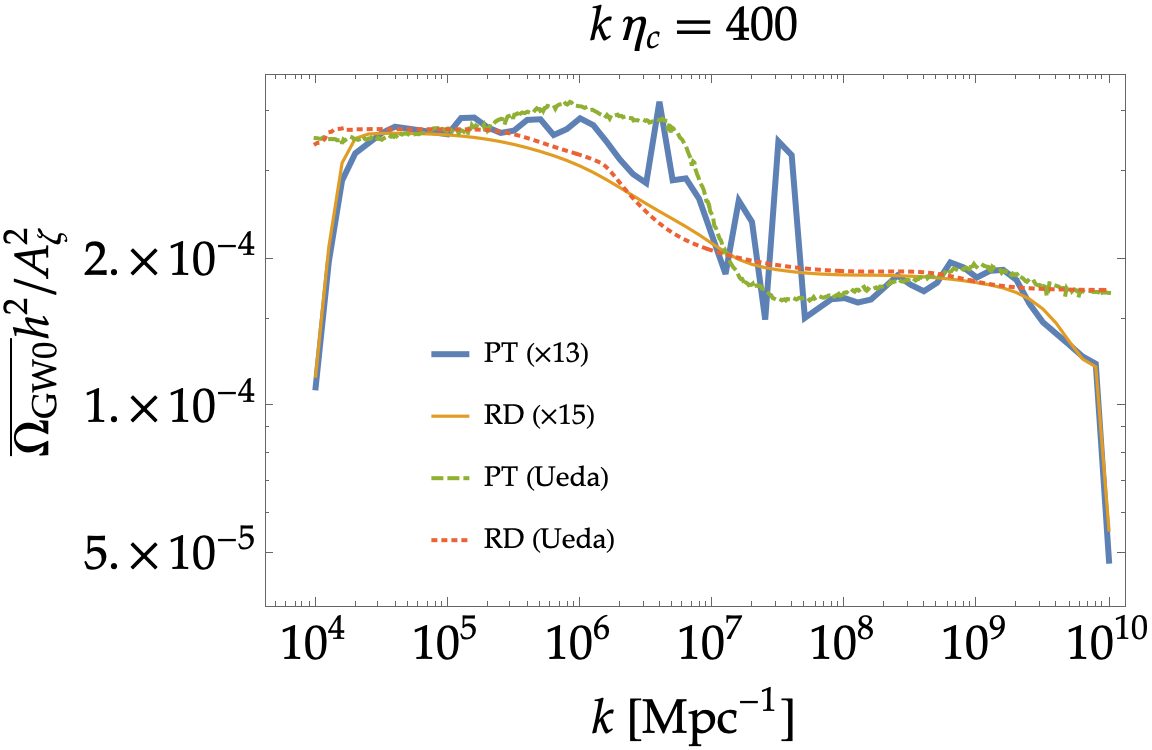

In [204]:
FigOGW0h2kint2530wUeda = 
    ListLogLogPlot[{Select[OGW0h2List.DiagonalMatrix[{1,13}],#[[2]]< 5 10^-4&],OGW0RDh2List.DiagonalMatrix[{1,15}],
                    OGW0h2Ueda,OGW0h2RDUeda}, 
                    PlotStyle->{AbsoluteThickness[3],Automatic,{AbsoluteThickness[2],Dashed},
                    {AbsoluteThickness[2],Dotted}},
                    FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                            "/", Subscript[A,\[Zeta]]^2}], None},
                                {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}},
                    PlotLegends->Placed[LineLegend[{Row[{"PT (\[Times]", 13, ")"}],Row[{"RD (\[Times]", 15, ")"}],
                                                    "PT (Ueda)","RD (Ueda)"}, 
                                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"],
                                                    LegendMarkerSize->20], {0.3,0.3}]]

In [166]:
Export["fast/OGW0h2kint2530wUeda.pdf", FigOGW0h2kint2530wUeda];

In [135]:
OGW0h2mono = Import["num/fast/OGW0h2mono.dat"];
OGW0h2RDmono = Import["num/fast/OGW0h2RDmono.dat"];

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00458333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00458333], AbsoluteThickness[1.6], Dashing[{Small, Small}], 
 
>       RGBColor[0.368627, 0.505882, 0.709804]], 
 
>      Directive[PointSize[0.00458333], AbsoluteThickness[1.6], Dashing[{0, Small}], 
 
>       RGBColor[0.882353, 0.611765, 0.141176]], 
 
>      Directive[PointSize[0.00458333], AbsoluteThickness[1.6], Thickness[Tiny], 
 
>       GrayLevel[0.5]]}, {conv, mono, RDmono, RDmono (scaled)}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True}, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> {Row, 2}, 
 
>     LegendMarkerSize -> 20], {0.45, 0.15}, Identity]]
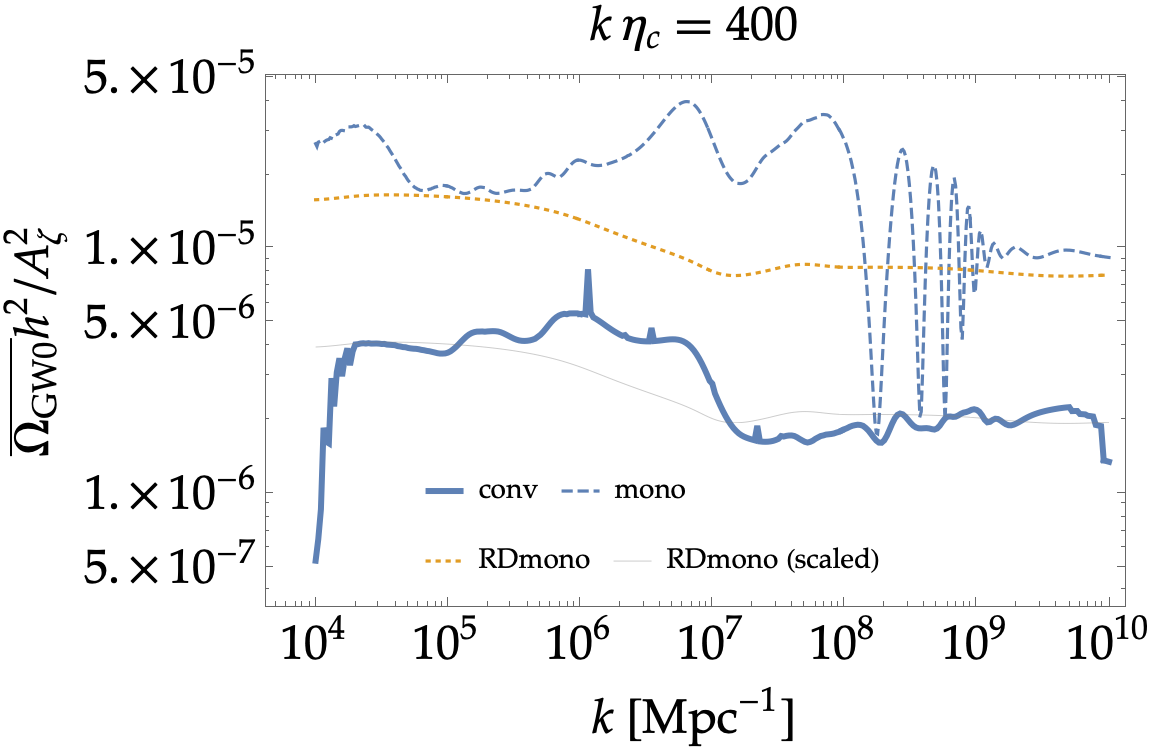

In [154]:
FigOGW0h2 = ListLogLogPlot[{Select[OGW0h2List,#[[2]]<10^-4&], OGW0h2mono, OGW0h2RDmono, OGW0h2RDmono.{{1,0},{0,0.25}}}, 
                        PlotStyle->{AbsoluteThickness[3],{Dashed,Color[[1]]},{Dotted,Color[[2]]},{Thin,Gray}},
                        FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                                        "/", Subscript[A,\[Zeta]]^2}], None},
                                            {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}},
                        PlotLegends->Placed[LineLegend[{"conv","mono","RDmono","RDmono (scaled)"}, 
                                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"],
                                                    LegendMarkerSize->20, LegendLayout->{"Row",2}], {0.45,0.15}]]

In [155]:
Export["fast/OGW0h2.pdf", FigOGW0h2];

-Graphics-
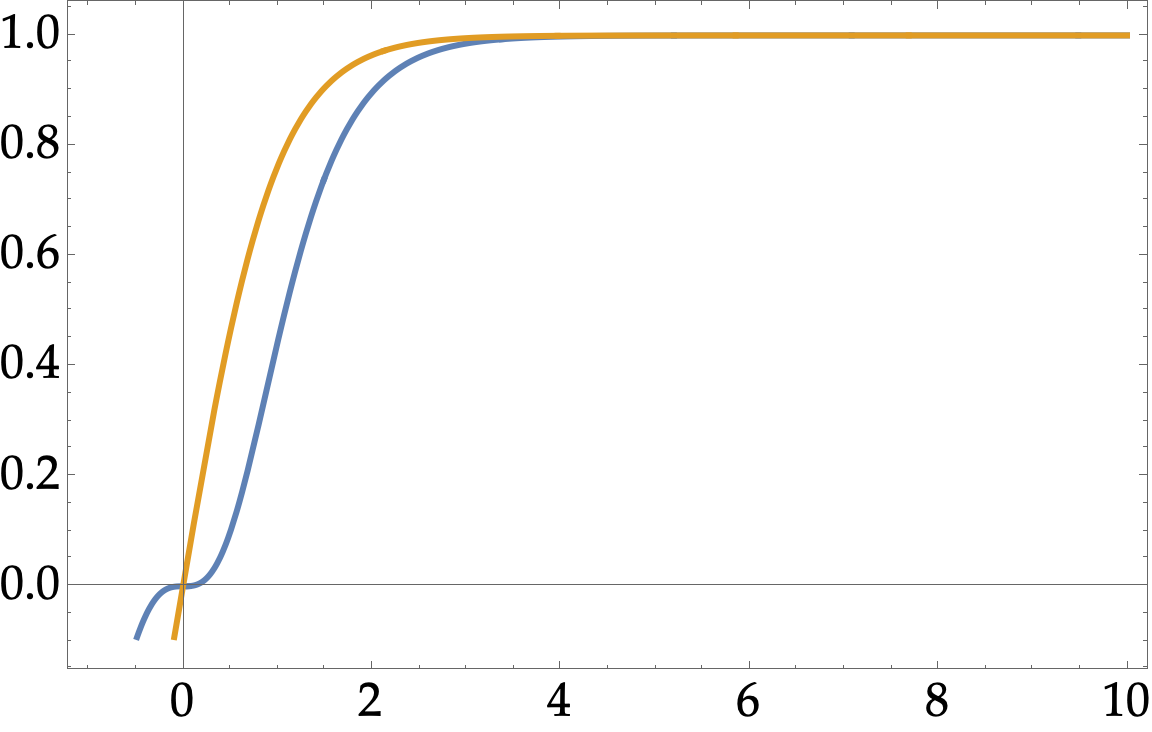

In [177]:
Plot[{Tanh[x]^3,Tanh[x]},{x,-1,10}]

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
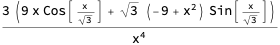

In [47]:
PhiRD[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRDp[x_] = D[PhiRD[x],x] // Simplify
aRD[eta_] = eta/13720 0.0184;

In [62]:
aRD[400 10^-5]

-9
5.36443 10

In [60]:
NIntegrate[k aRD[xp/k] Sin[xp] (2PhiRD[u xp] PhiRD[v xp] + (PhiRD[u xp] + u xp PhiRDp[u xp])(PhiRD[v xp] + v xp PhiRDp[v xp]) ) 
            /. {k->10^7,u->1,v->1}, {xp,0,400}] 

-6
7.05341 10

In [42]:
ItRDsAnal[k1_,k2_,kGW_,eta_] := kGW NIntegrate[etap Sin[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                (PhiRD[k1 etap] + k1 etap PhiRDp[k1 etap])
                                (PhiRD[k2 etap] + k2 etap PhiRDp[k2 etap]) ), 
                                {etap,0,eta}, WorkingPrecision->30]
ItRDcAnal[k1_,k2_,kGW_,eta_] := kGW NIntegrate[etap Cos[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] +
                                (PhiRD[k1 etap] + k1 etap PhiRDp[k1 etap])
                                (PhiRD[k2 etap] + k2 etap PhiRDp[k2 etap]) ), 
                                {etap,0,eta}, WorkingPrecision->30]
IRD2Analbar[k1_,k2_,kGW_,eta_] := (ItRDsAnal[k1,k2,kGW,eta]^2 + ItRDcAnal[k1,k2,kGW,eta]^2)/2;

In [45]:
IRD2Analbar[10^5,10^5,10^5,10^-5]

-11
9.5241379982577425506266316672 10

In [46]:
IRD2Analbar[10^8,10^8,10^7,xf/10^7] // Quiet // AbsoluteTiming

-16
{5.47393, 3.86312124072045229526605404166 10   }

In [171]:
i1step = 5;
i2step = 5;
(*Di = 100;*)
Dlogk1 = dlogk i1step
Dlogk2 = dlogk i2step
Dlog10k1 = Dlogk1/Log[10]
Dlog10k2 = Dlogk2/Log[10]
(*2Di/istep + 1*)
Select[Flatten[Table[If[Abs[10^logk1-10^logk2] <= 10^7 <= 10^logk1+10^logk2,
                    {10^logk1,10^logk2}, {0}], {logk1,(*Max[300-Di,1]*)4,(*Max[300+Di,iMax]*)10,Dlog10k1}, 
                    {logk2,(*Max[300-Di,1]*)4,(*Min[300+Di,iMax]*)10,Dlog10k2}], 1], #[[1]] != 0&] // Length
OGWcRD[k_,eta_] := 8/243 Dlogk1 Dlogk2 / (aint[eta]calHint[eta])^2 *
    Sum[If[Abs[10^logk1-10^logk2] <= k <= 10^logk1+10^logk2,
        ( 10^(2logk1) - (k^2-10^(2logk2)+10^(2logk1))^2/4/k^2 )^2 / 10^logk1 / 10^logk2 
        IRD2bar[10^logk1,10^logk2,k,eta],
        0], {logk1,(*Max[i-Di,1]*)4,(*Min[i+Di,iMax]*)10,Dlog10k1}, 
        {logk2,(*Max[i-Di,1]*)4,(*Min[i+Di,iMax]*)10,Dlog10k2}]

0.115129
0.115129
0.05
0.05
451